##How non-linear SVM works

 - Step 1: Data Mapping: Non-linear SVC uses the kernel function to map the input data into a higher-dimensional space.
 - Step 2: Finding the Optimal Hyperplane: In this transformed space, it finds the optimal hyperplane (a linear decision boundary) that maximizes the margin between different classes.
 - Step 3: Decision Boundary: The decision boundary, when mapped back to the original space, appears as a non-linear boundary that can separate complex data patterns.


In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Step 2: Generate synthetic non-linear data
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1)

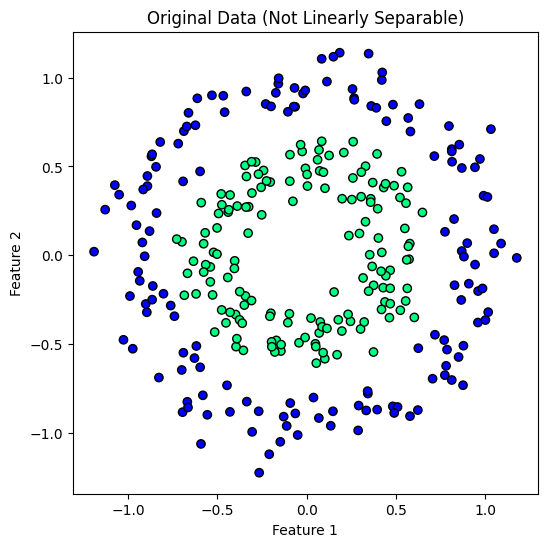

In [ ]:
# Step 3: Visualize the original data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', edgecolors='k')
plt.title("Original Data (Not Linearly Separable)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

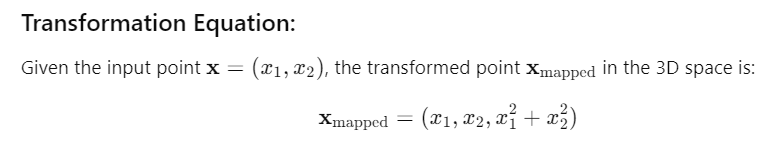

In [ ]:
# Step 4: Data Mapping - Manually map to a higher dimension using an RBF-like transformation
# Let's create a 3D plot where we map the data to a higher dimension
X_mapped = np.c_[X, X[:, 0]**2 + X[:, 1]**2]

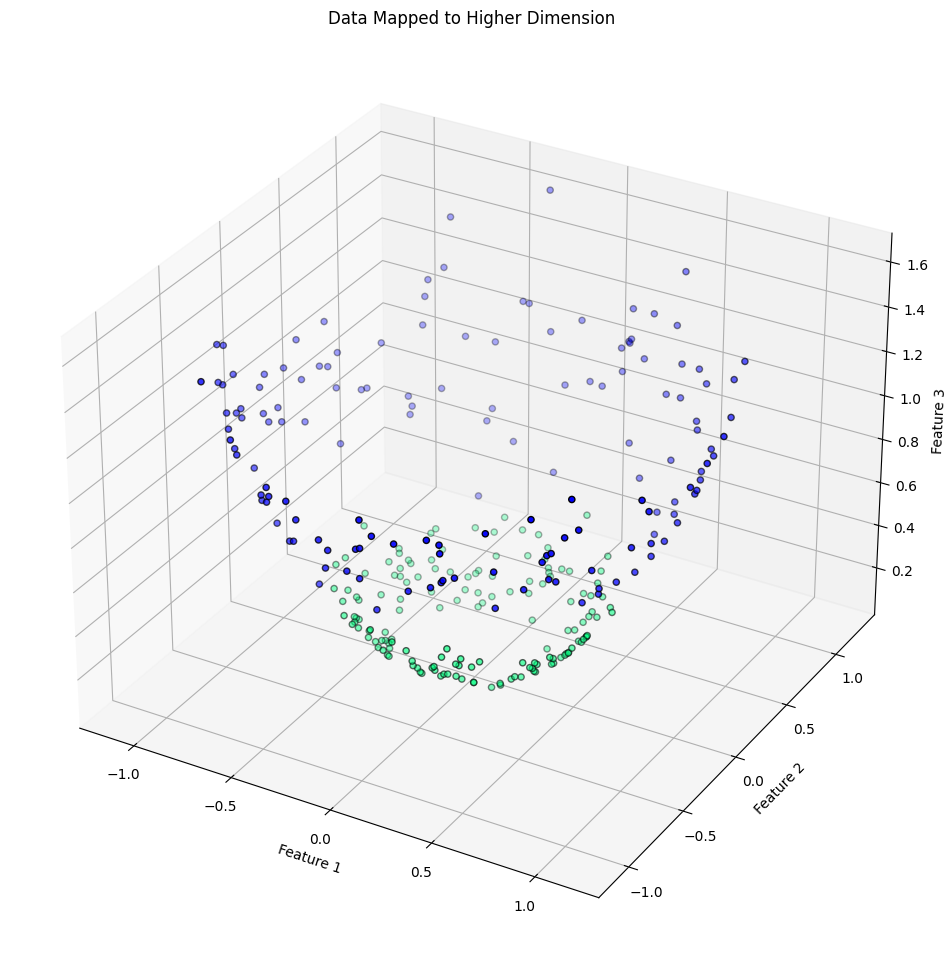

In [ ]:

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_mapped[:, 0], X_mapped[:, 1], X_mapped[:, 2], c=y, cmap='winter', edgecolors='k')
ax.set_title("Data Mapped to Higher Dimension")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()

In [ ]:
# Step 5: Train a non-linear SVC model
svc = SVC(kernel='rbf', C=1.0, gamma='auto')
svc.fit(X, y)

SVC(gamma='auto')

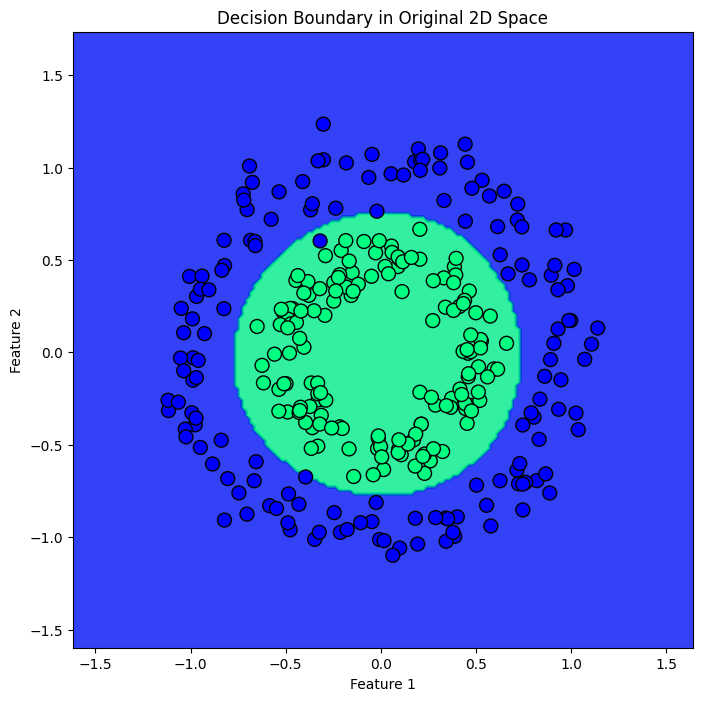

In [ ]:

# Step 6: Plot decision boundary in the original 2D space
def plot_decision_boundary(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap='winter')
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap='winter')
    ax.set_xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
    ax.set_ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.figure(figsize=(8, 8))
plot_decision_boundary(svc, X, y, plt.gca())
plt.title("Decision Boundary in Original 2D Space")
plt.show()
